In [1]:
import os
import sys
sys.path.append('../')
import numpy as np 
import cv2
import matplotlib.pyplot as plt
from omegaconf import OmegaConf

import torch
import torch.nn as nn

from Data.MVTEC_data import MVTecDataloader
from Models.STFPM import STFPM

from Utils.Visualizer import plot_distribution, cal_best_threshold
from sklearn.metrics import RocCurveDisplay


In [2]:
args = OmegaConf.load('../Config/mvtec_STFPM_config.yaml')
np.random.seed(0)
torch.manual_seed(0)
args

{'experiment_name': 'STFPM', 'dataroot': '../Datasets/mvtec/grid', 'experiment_path': '../Experiments/STFPM/mvtec/transistor', 'weight_path': '../checkpoint/STFPM/MVTEC/grid/best.pth.tar', 'checkpoint_save': '../Experiments/STFPM/mvtec/carpet/checkpoint', 'checkpoint_load': '../Experiments/STFPM/mvtec/carpet/checkpoint/checkpoint_best.pt', 'log_path': '.,/Experiments/STFPM/mvtec/carpet/carpet.log', 'start_epoch': 1, 'finish_epoch': 200, 'manualseed': 42, 'batchSize': 64, 'imageSize_h': 256, 'imageSize_w': 256, 'lossSize_h': 64, 'lossSize_w': 64, 'device': 'gpu', 'gpu_ids': 0, 'ngpu': 1, 'lr': 0.4, 'momentum': 0.9, 'weight_decay': 0.0001, 'sample_interval': 20}

In [3]:
# train_loader, val_loader = MVTecDataloader(args.dataroot, batchSize=args.batchSize, imageSize_h=args.imageSize_h, imageSize_w=args.imageSize_w, is_train=True)
test_neg_loader, test_pos_loader = MVTecDataloader(args.dataroot, batchSize=args.batchSize, imageSize_h=args.imageSize_h, imageSize_w=args.imageSize_w, is_train=False)

In [4]:
Tester = STFPM(args)

/home/gin/miniconda3/envs/vdt/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/gin/miniconda3/envs/vdt/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Checkpoint load fail.
Student'weight have been loaded.


/home/gin/miniconda3/envs/vdt/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [5]:
Tester.load_weight()

In [6]:
Tester.cal_auc(test_neg_loader, test_pos_loader)

(0.9816207184628237,
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True]),
 array([0.00299557, 0.0035306 , 0.00423634, 0.00290703, 0.00951621,
        0.006458  , 0.01256082, 0.00383687, 0.00417841, 0.00270211,
        0.00666727, 0.00491016, 0.00471836, 0.00665404, 0.0043033 ,
        0.004226  , 0.00664705, 0.00622624, 0.00946762, 0.00559224,
        0.00973711, 0.04735725, 0.09422256, 0.04256746, 0.09452632,
        0.04963439,

In [7]:
scores_neg, scores_pos = Tester.get_scores(test_neg_loader, test_pos_loader)

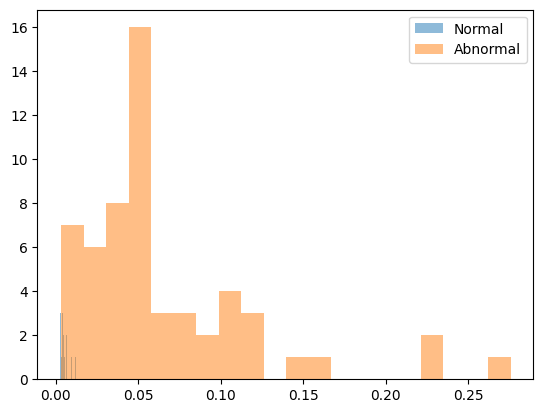

In [8]:
plot_distribution(scores_neg, scores_pos, 20)

In [9]:
list_labels = np.concatenate(([0] * len(scores_neg), [1] * len(scores_pos)))
list_errors = np.concatenate((scores_neg, scores_pos))

In [10]:
list_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
list_scores = (list_errors - np.min(list_errors)) / (np.max(list_errors) - np.min(list_errors))
list_scores

array([1.07461183e-03, 3.03382753e-03, 5.61814570e-03, 7.50371283e-04,
       2.49523888e-02, 1.37535912e-02, 3.61013505e-02, 4.15532791e-03,
       5.40602821e-03, 0.00000000e+00, 1.45199237e-02, 8.08560273e-03,
       7.38323710e-03, 1.44714588e-02, 5.86335225e-03, 5.58026995e-03,
       1.44458689e-02, 1.29048962e-02, 2.47744391e-02, 1.05832809e-02,
       2.57612745e-02, 1.63521505e-01, 3.35136362e-01, 1.45981885e-01,
       3.36248701e-01, 1.71860110e-01, 2.44919088e-01, 1.98127517e-01,
       1.53796538e-01, 6.33033733e-02, 1.39266995e-01, 1.62191188e-01,
       1.60673686e-01, 1.96192002e-01, 4.08463655e-01, 1.70623487e-01,
       3.63581705e-01, 1.00000000e+00, 1.99490561e-01, 4.22571905e-01,
       2.79617428e-01, 3.61563448e-01, 8.24329194e-01, 1.66820225e-01,
       2.05604681e-01, 1.44036690e-01, 2.80761804e-02, 1.53017348e-01,
       6.36125751e-02, 1.91718738e-01, 4.39485360e-01, 3.60655823e-02,
       2.66848190e-02, 2.39977940e-03, 1.44130496e-01, 1.86028887e-01,
      

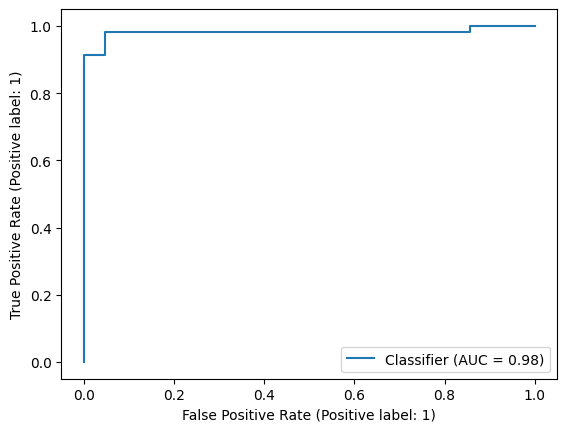

In [12]:
RocCurveDisplay.from_predictions(list_labels, list_scores)

In [13]:
best_thre, best_F1_score, best_F2_score, best_accuracy = cal_best_threshold(list_labels, list_scores)
best_thre, best_F1_score, best_F2_score, best_accuracy

(0.026684818969992065,
 0.9824561403508771,
 0.9824561403508771,
 0.9615384615384616)

In [18]:
len(test_neg_loader.dataset), len(test_pos_loader.dataset)

(21, 57)

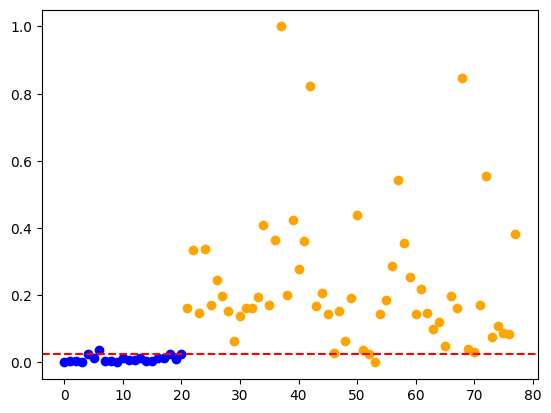

In [15]:
x = range(len(list_scores))
plt.scatter(x[:len(test_neg_loader.dataset)], list_scores[:len(test_neg_loader.dataset)], c='blue', label='First 40')
plt.scatter(x[len(test_neg_loader.dataset):], list_scores[len(test_neg_loader.dataset):], c='orange', label='Remaining')
plt.axhline(y=best_thre, color='red', linestyle='--', label='y=0.5')